<a href="https://colab.research.google.com/github/Esau-May/MachineLearningCourse/blob/main/Activities/DecisionTree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree


#Dataset to be used (clasification - binary)
dataset = pd.read_csv("diabetes.csv", sep = ',')
dataset.rename(columns = {'Outcome':'Diabetes'}, inplace = True) #I changed the Outcome column which describes if the pacient has diabetes or not (0 = no and 1 = yes)
print(dataset.head(5))


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Diabetes  
0                     0.627   50         1  
1                     0.351   31         0  
2                     0.672   32         1  
3                     0.167   21         0  
4                     2.288   33         1  


In [ ]:
#Chechking for null values in the dataset
print("Total cells with nulls (previous):", dataset.isnull().sum().sum()) #Since there's none I do not have to worry about it

Total cells with nulls (previous): 0


#Model

In [ ]:
#Stablishing variables
X = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dataset['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
'''
we stablish the max_depth = 3 tu prune the tree in order to
avoid overfitting
'''

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train) #fit to the trian data

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred = model.predict(X_test) #using the default hyperparameters
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
model.feature_importances_

array([0.        , 0.59736987, 0.        , 0.        , 0.        ,
       0.26215623, 0.        , 0.1404739 ])

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Pregnancies,0.000000
BloodPressure,0.000000
SkinThickness,0.000000
Insulin,0.000000
DiabetesPedigreeFunction,0.000000
Age,0.140474
BMI,0.262156
Glucose,0.597370


In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154





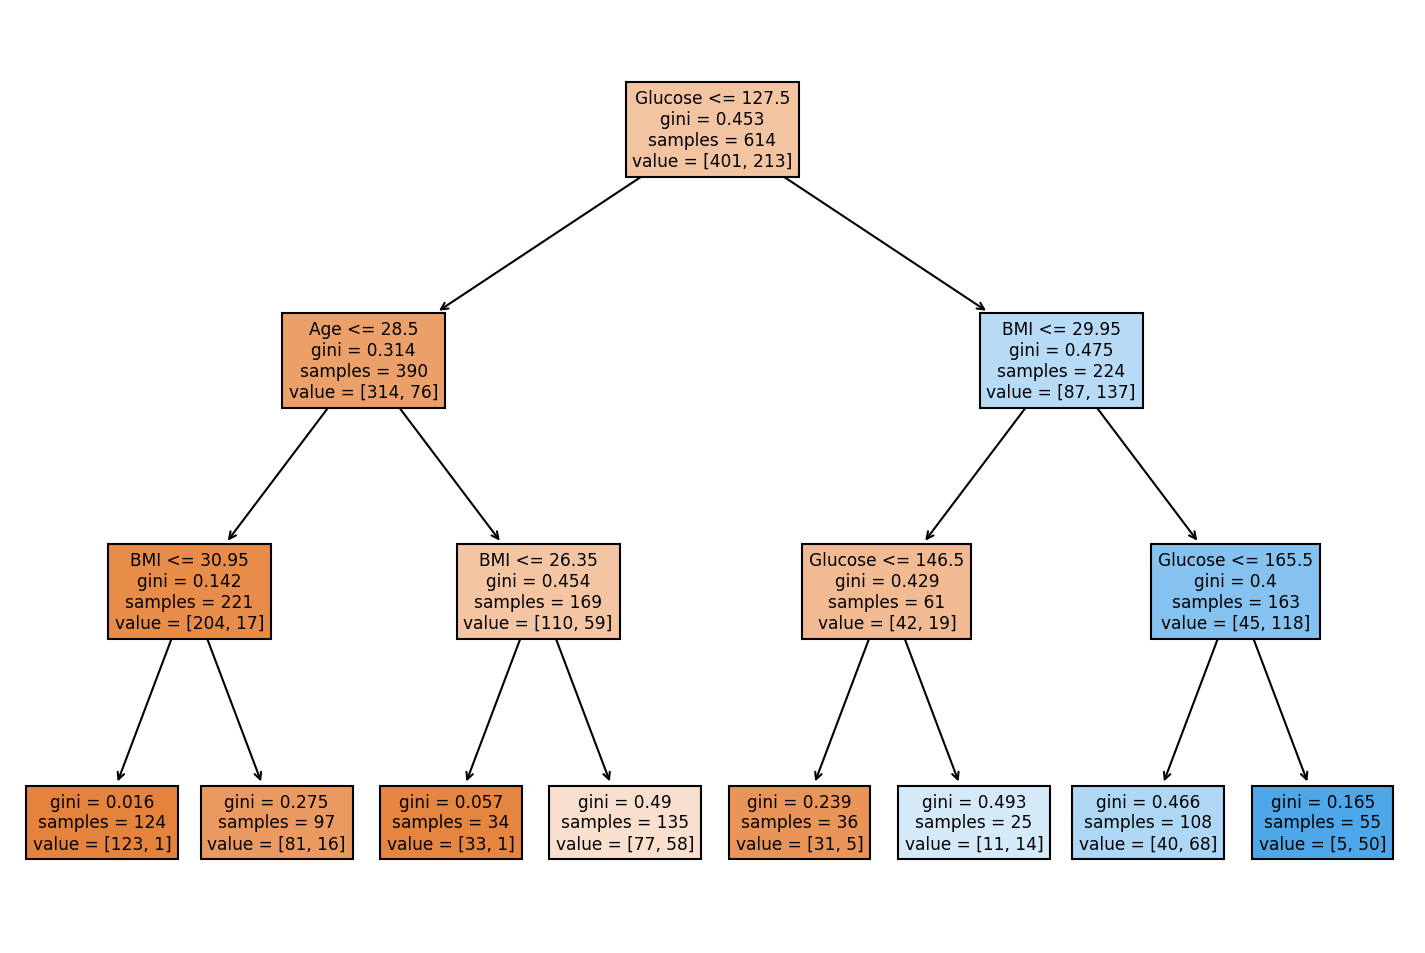

In [ ]:
report_model(model)

#Accuracy


In [ ]:
accuracy = accuracy_score(y_test, pred)
print(f'Precisión del modelo: {accuracy:.2f}')

Precisión del modelo: 0.76
